In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1 - chargement des données

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117      2.0   2.0  
4                                                NaN   20009      0.0   1.0  

[5 rows x 29 columns]

In [4]:
df.shape

(74111, 29)

In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
index = df.columns
for i in index:
    print(df[i].value_counts())

id
6901257     1
2460250     1
289037      1
16492690    1
14838028    1
           ..
14222061    1
6238463     1
15285110    1
11226321    1
3534845     1
Name: count, Length: 74111, dtype: int64
log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: count, Length: 767, dtype: int64
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment  

thumbnail_url
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              3
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small    2
                                                                                                ..
https://a0.muscache.com/im/pictures/111150220/7099e1de_original.jpg?aki_policy=small             1
https://a0.muscache.com/im/pictures/bfc6695c-93f9-4a90-a6d8-9f6c038fff28.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/99319739/70c4beaf_original.jpg?aki_policy=small              1
https://a0.muscache.com/im/pictures/3897544/bed318ce_original.jpg?aki_policy=small             

# 2 - Traitement des valeurs manquantes :

In [9]:
print(df.columns.size)
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

29

bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


## 2.1 - de Type String :

## 2.1.1 - Neighbourhood par "unknown":

In [10]:
df['neighbourhood'].fillna('unknown',inplace=True)

## 2.1.2 - Has_profile_pic par "f" (false) :

In [11]:
df.host_has_profile_pic.fillna('f',inplace=True)

## 2.1.3 - Host_identity_verified par "f" (false) :

In [12]:
df.host_identity_verified.fillna('f',inplace=True)

## 2.2 - De Type Numerique :

## 2.2.1 - Zip code (deduit à partie de neighbourhood) : 

In [13]:
placeToZip = {
    "Park Slope": 11215,
    "Financial District": 10004,
    "Bushwick": 11237,
    "Gramercy Park": 10010,
    "Brighton Beach": 11235,
    "Civic Center": 10007,
    "Flatbush": 11226,
    "Sunset Park": 11220,
    "Crown Heights": 11213,
    "Williamsburg": 11211,
    "Western Addition/NOPA": 94115,
    "Ridgewood": 11385,
    "Concourse": 10453,
    "Roxbury": 2118,
    "Lower East Side": 10002,
    "Soho": 10012,
    "Mission District": 94110,
    "Upper East Side": 10021,
    "Marina Del Rey": 90292,
    "Ditmars / Steinway": 11105,
    "Bedford-Stuyvesant": 11205,
    "Encino": 91316,
    "Chelsea": 10001,
    "Richmond District": 94121,
    "Wicker Park": 60622,
    "Downtown": 60622,
    "SoMa": 94103,
    "South End": 2118,
    "Back Bay": 2116,
    "Harlem": 10026,
    "Tenderloin": 94102,
    "Mission Bay": 94158,
    "Nolita": 10012,
    "Alphabet City": 10009,
    "Bayview": 94124,
    "Long Island City": 11101,
    "East Harlem": 10029,
    "East Boston": 2128,
    "Lefferts Garden": 11225,
    "Coney Island": 11224,
    "Russian Hill": 94133,
    "Columbia Street Waterfront": 11231,
    "Washington Heights": 10032,
    "Upper West Side": 10023,
    "Carroll Gardens": 11231,
    "Inwood": 10034,
    "Murray Hill": 10016,
    "Sunnyside": 11104,
    "Hell's Kitchen": 10019,
    "Venice": 90291,
    "South Beach": 94105,
    "Times Square/Theatre District": 10036,
    "Astoria": 11103,
    "Nob Hill": 94108,
    "Meatpacking District": 10014,
    "Midtown East": 10022,
    "Hamilton Heights": 10031,
    "East Hollywood": 90028,
    "Howard Beach": 11414,
    "Midtown": 10019,
    "Flatiron District": 10010,
    "Borough Park": 11219,
    "Malibu": 90265,
    "Chinatown": 10013,
    "Marina": 94123,
    "Forest Hills": 11375,
    "Kew Garden Hills": 11367,
    "Morningside Heights": 10027,
    "Allston-Brighton": 2134,
    "Woodland Hills/Warner Center": 91367,
    "Beacon Hill": 2108,
    "Telegraph Hill": 94133,
    "Greenwich Village": 10014,
    "Clinton Hill": 11205,
    "Georgetown": 11205,
    "West Village": 10014,
    "Flushing": 11354,
    "North End": 2113,
    "Rancho Palos Verdes": 90275,
    "Midwood": 11230,
    "Fort Greene": 11205,
    "East Flatbush": 11203,
    "Prospect Heights": 11238,
    "East Village": 10003,
    "Northridge": 91324,
    "Noe Valley": 94114,
    "Elmhurst": 11373,
    "Red Hook": 11231,
    "Manhattan": 11231,
    "Excelsior": 94112,
    "Union Square": 10003,
    "Twin Peaks": 94131,
    "North Beach": 94133,
    "Hollywood": 90028,
    "Outer Sunset": 94122,
    "Jamaica Plain": 2130,
    "Jamaica": 11432,
    "Cow Hollow": 94123,
    "Logan Square": 60647,
    "Arrochar": 10305,
    "Brooklyn Heights": 11201,
    "Santa Monica": 90402,
    "Dorchester": 2124,
    "Woodhaven": 11421,
    "Lower Haight": 94117,
    "Crocker Amazon": 94112,
    "Gravesend": 11223,
    "Bernal Heights": 94110,
    "Claremont": 94110,
    "Parkchester": 10462,
    "Roslindale": 2131,
    "The Rockaways": 11693,
    "Pacific Heights": 94115,
    "Greenwood Heights": 11232,
    "Haight-Ashbury": 94117,
    "Corona": 11368,
    "West Hollywood": 90046,
    "Near Northeast/H Street Corridor": 90046,
    "Tribeca": 10013,
    "Queens": 11450,
    "Greenpoint": 11222,
    "East Elmhurst": 11369,
    "Glendale": 11385,
    "Kips Bay": 10016,
    "Fenway/Kenmore": 2215,
    "Mission Hill": 2120,
    "Middle Village": 11379,
    "Richmond Hill": 11418,
    "Bath Beach": 11214,
    "Parkside": 11226,
    "Diamond Heights": 94131,
    "East New York": 11207,
    "Alamo Square": 94115,
    "Downtown Brooklyn": 11217,
    "Bel Air/Beverly Crest": 90077,
    "Mott Haven": 10455,
    "Sheepshead Bay": 11235,
    "Capitol Hill": 11235,
    "South Boston": 2127,
    "Presidio": 94129,
    "Hollywood Hills": 90068,
    "Inner Sunset": 94122,
    "unknown":-1
}

In [14]:
df['zipcode'] = df['zipcode'].str.split('-').str[0]


In [15]:
def fillZipCode():
    for i, (n , z) in enumerate(zip(df["neighbourhood"],df["zipcode"])):
        if pd.isnull(z):
            df.at[i, "zipcode"] = placeToZip[n]
fillZipCode()

In [16]:
def replace_zipcode_values(df):
    conditions = (df['zipcode'].str.contains(' ')) | (df['zipcode'] == '1m') | (df['zipcode'].str.contains('\r'))
    df.loc[conditions, 'zipcode'] = -1
    return df

df = replace_zipcode_values(df)

In [17]:
df['zipcode'].dtype

dtype('O')

## 2.2.2 - review_scores_rating - dropped : 

In [18]:
df.dropna(subset=['review_scores_rating'], inplace=True)

## 2.2.2 - bathrooms par "1" (le min qu'un logement peut avoir) : 

In [19]:
df.bathrooms.fillna(1,inplace=True)

## 2.2.3 - host_response_rate par mean value :

In [20]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
mean_value = df['host_response_rate'].mean()
df['host_response_rate'].fillna(mean_value, inplace=True)

## 2.2.4 - Host_response_rate - dropped :

In [21]:
df['host_response_rate'].value_counts(dropna=False)

host_response_rate
100.000000    37921
95.546716      9386
90.000000      2069
80.000000       964
70.000000       439
              ...  
15.000000         1
27.000000         1
31.000000         1
21.000000         1
66.000000         1
Name: count, Length: 78, dtype: int64

## 2.2.5 - beds par "accomodates :

In [22]:
df['beds'].fillna(df['accommodates'], inplace=True)

## 2.2.6 - Bedrooms par "mod 2 de beds"(2 beds per bedroom) :

In [23]:
def custom_fillna(value1, value2):
    if np.isnan(value1):
        return divmod(value2, 2)[0] + divmod(value2, 2)[1]
    else:
        return value1

df['bedrooms'] = df.apply(lambda row: custom_fillna(row['bedrooms'], row['beds']), axis=1)

## 2.3 - de type Date

## 2.3.1 First_review - dropped :

In [24]:
df.dropna(subset=['first_review'], inplace=True)

## 2.3.2 Host_since - dropped :

df.dropna(subset=['host_since'], inplace=True)

# 3 - Supprimer les colonnes inutiles

In [25]:
df.drop(['id','description','thumbnail_url','name','amenities',"longitude","latitude"],axis=1,inplace=True)

# 4 - Visualisation

'Done'

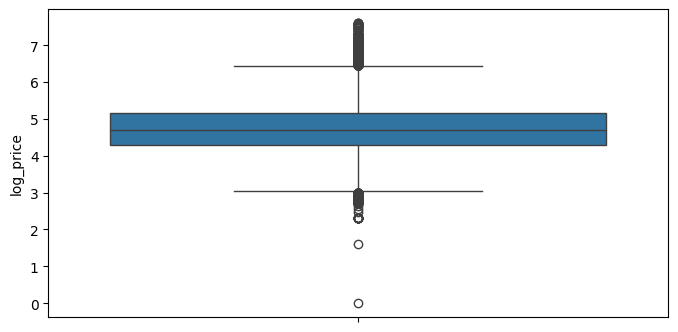

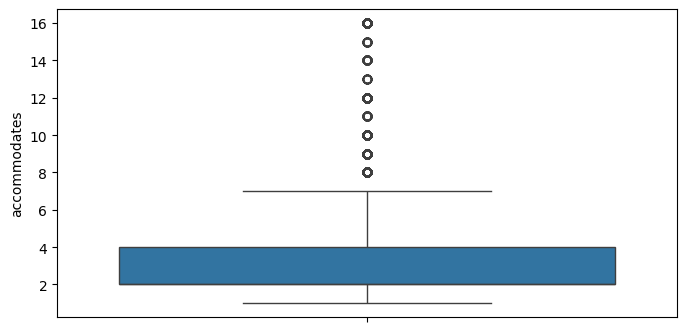

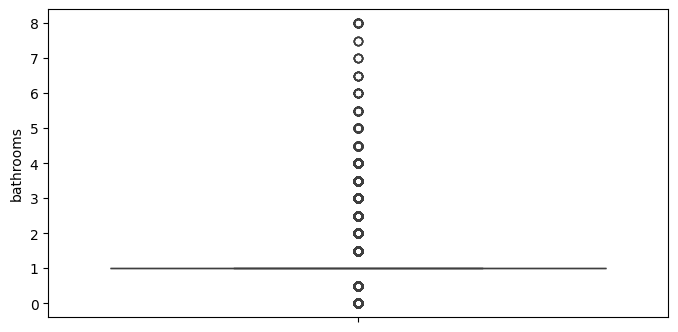

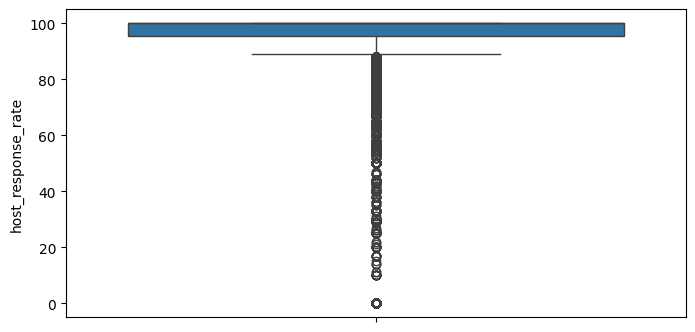

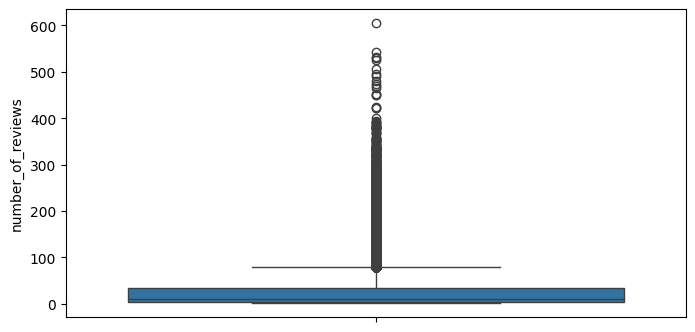

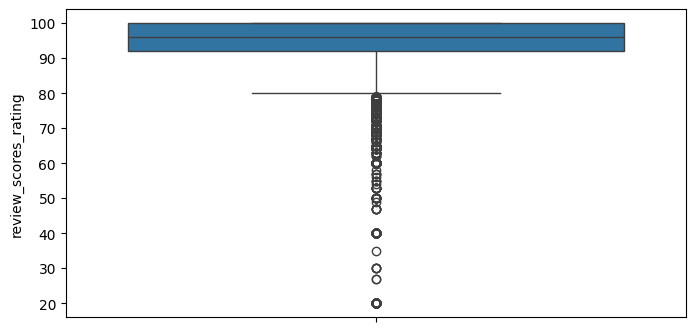

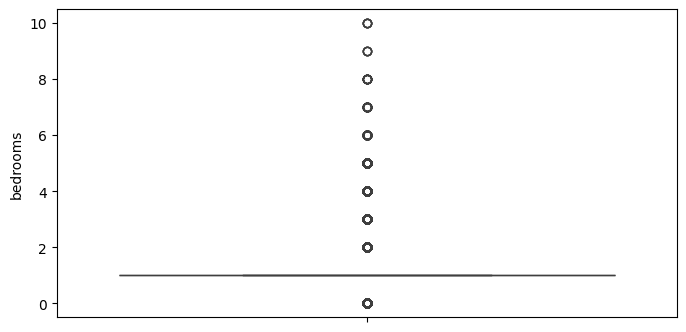

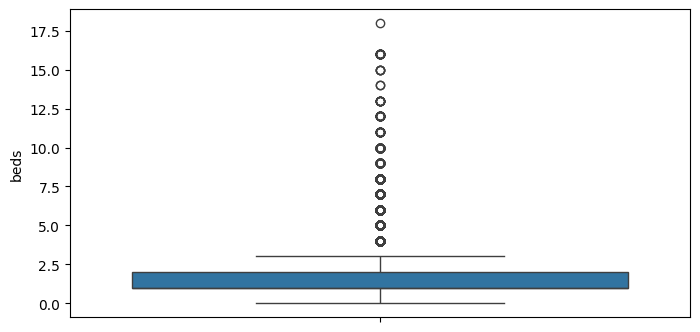

In [26]:

def plot_box(df):
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.max_open_warning': 0})
    
    
    for col in df.columns:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
             
            fig = plt.figure(figsize=(8,4))
            fig.clf()
            sns.boxplot(df[col])

    return 'Done'
    
plot_box(df)

'Done'

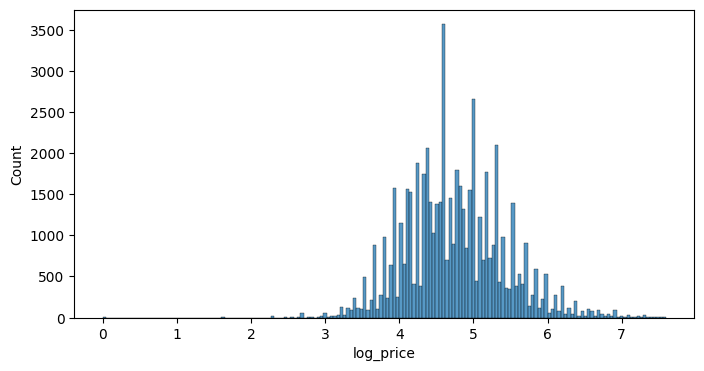

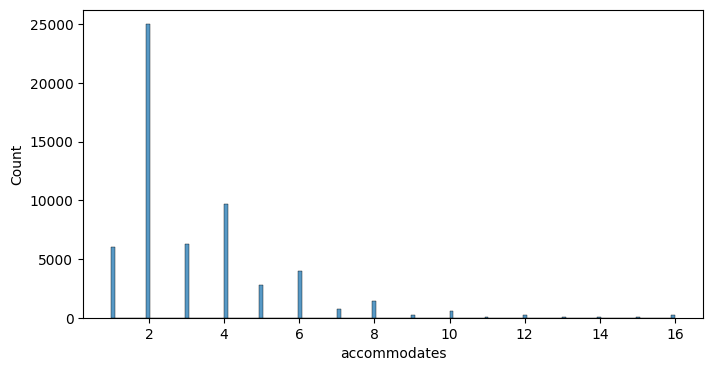

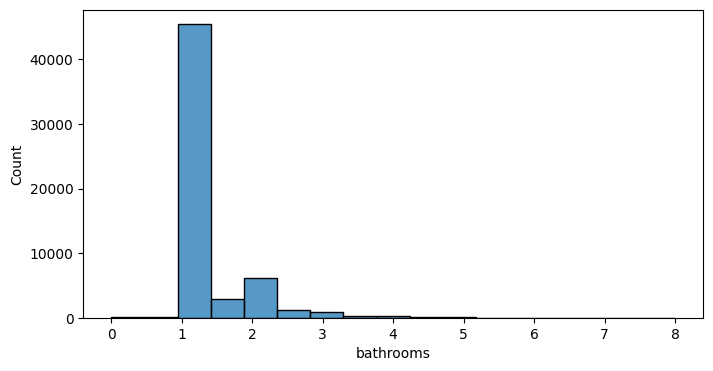

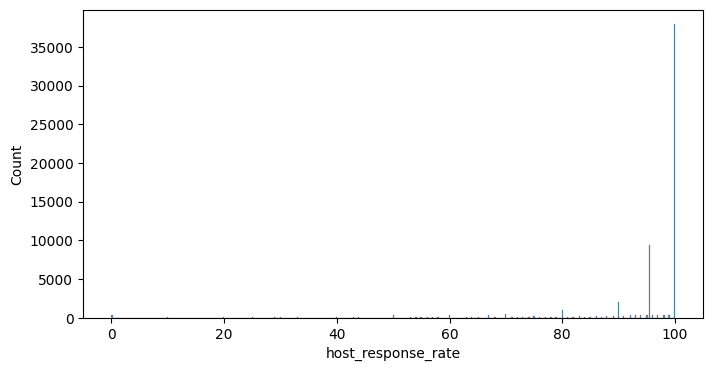

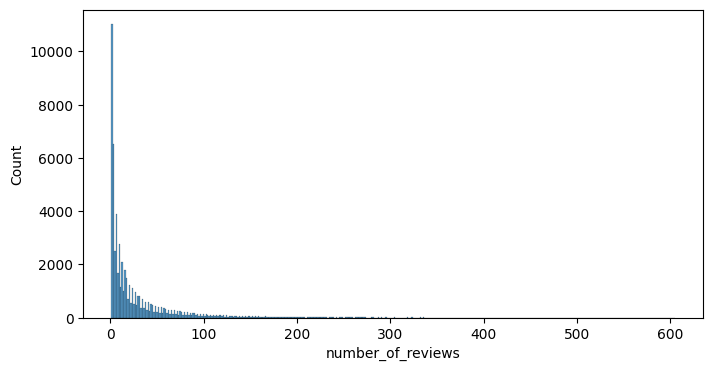

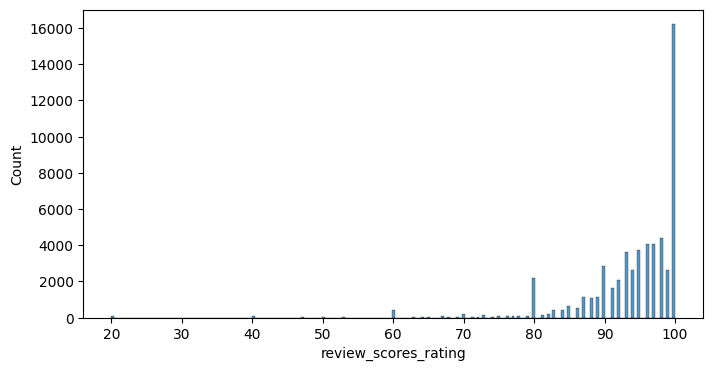

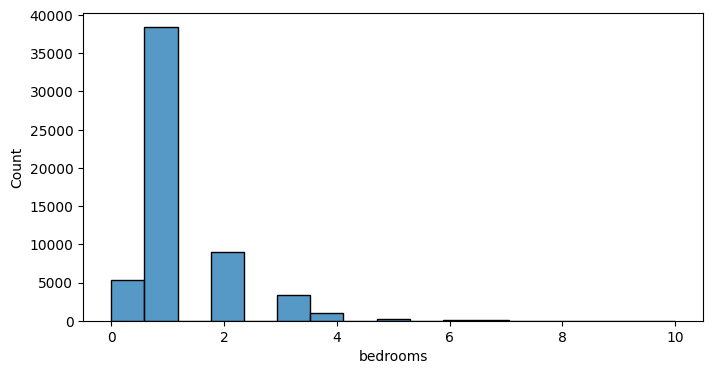

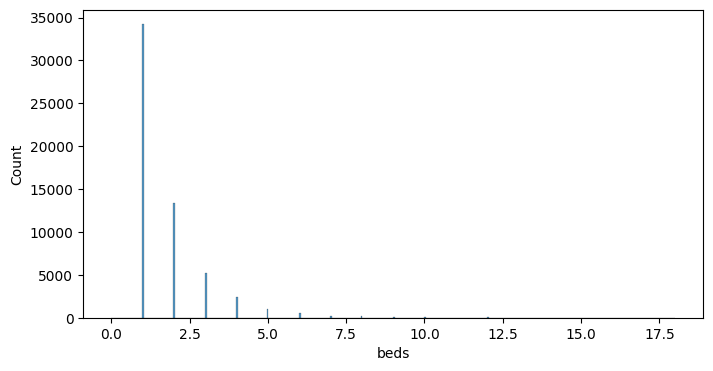

In [27]:
def plot_hist(df):
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.max_open_warning': 0})
    
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
             
            fig = plt.figure(figsize=(8,4))
            fig.clf()
            sns.histplot(df[col])
            # fig.savefig('hist_' + col + '.png')

    return 'Done'

plot_hist(df)

# 5 - Normalisation

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler    
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df['zipcode'] = MinMaxScaler().fit_transform(df[['zipcode']])
df['zipcode'] = df['zipcode'].astype(float)

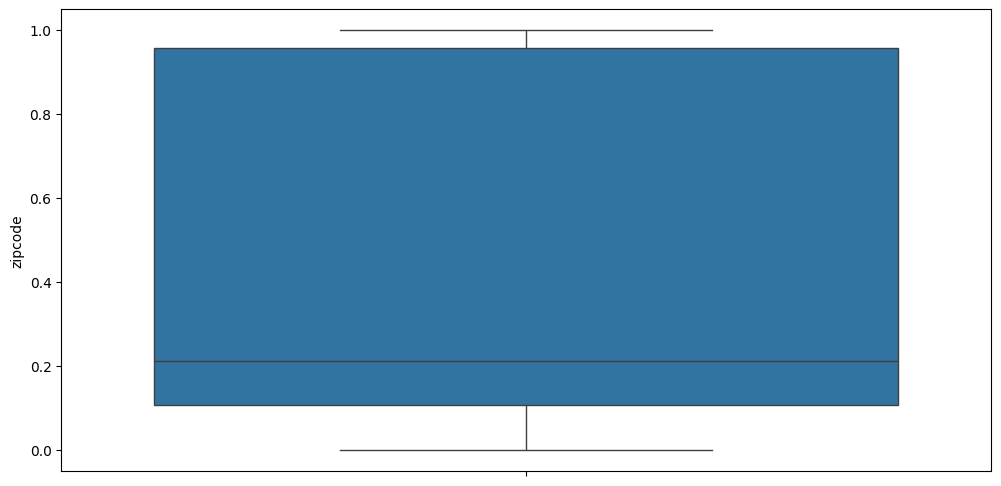

In [30]:
def zip_hist(df):
    plt.rcParams.update({'figure.max_open_warning': 0}) 
    fig = plt.figure(figsize=(12,6))
    sns.boxplot(df["zipcode"])
zip_hist(df)

# 6 - Traitement de catégories 

In [31]:
df.host_has_profile_pic.unique()

array(['t', 'f'], dtype=object)

In [32]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

def codage_categorie(data):
    for column_name in data.columns:
        if data[column_name].dtype == object and column_name != "host_since" and column_name != "last_review" and column_name != "first_review" :
            data_encoded = pd.get_dummies(data[column_name], prefix=column_name).astype(float)
            data = pd.concat([data, data_encoded], axis=1)
            data.drop([column_name],axis=1,inplace=True)
        elif column_name == "host_since" or column_name == "last_review" or column_name == "first_review" :
            data[column_name] = pd.to_datetime(data[column_name])
            # data[column_name] = (data[column_name] - data[column_name].min()) / (data[column_name].max() - data[column_name].min())
            data[column_name] = MinMaxScaler().fit_transform(data[[column_name]])
            data.drop([column_name],axis=1,inplace=True)
        else:
            pass
    return data

df = codage_categorie(df)


In [33]:
df.columns.size

664

# 7 - target / features

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y = df['log_price']
x = df.drop('log_price', axis=1)

# 8 - Feature Selection

## Seuil d'écart (Variance Threshold)

### Threshold=0.2

In [36]:
from sklearn.feature_selection import VarianceThreshold

In [37]:
selector = VarianceThreshold(threshold=0.2)
selector.fit(x)

VarianceThreshold(threshold=0.2)

In [38]:
np.array(x.columns)[selector.get_support()]
data1 = df[np.array(x.columns)[selector.get_support()]]
data1.columns

Index(['accommodates', 'bathrooms', 'host_response_rate', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'property_type_Apartment',
       'room_type_Entire home/apt', 'room_type_Private room',
       'cancellation_policy_moderate', 'cancellation_policy_strict', 'city_LA',
       'city_NYC'],
      dtype='object')

In [39]:
print(np.array(x.columns)[selector.get_support()].size)

14


### Threshold=0.1

In [40]:
selector_treeshold_1 = VarianceThreshold(threshold=0.1)
selector_treeshold_1.fit(x)

VarianceThreshold(threshold=0.1)

In [41]:
data11 = df[np.array(x.columns)[selector_treeshold_1.get_support()]]
data11.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'host_response_rate',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'property_type_Apartment', 'property_type_House',
       'room_type_Entire home/apt', 'room_type_Private room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'city_LA', 'city_NYC',
       'host_identity_verified_f', 'host_identity_verified_t',
       'instant_bookable_f', 'instant_bookable_t'],
      dtype='object')

### Threshold=0.3

In [42]:
selector_treeshold_3 = VarianceThreshold(threshold=0.3)
selector_treeshold_3.fit(x)

VarianceThreshold(threshold=0.3)

In [43]:
data13 = df[np.array(x.columns)[selector_treeshold_3.get_support()]]
data13.columns

Index(['accommodates', 'bathrooms', 'host_response_rate', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

## SelectKBest

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

In [45]:
selector2 = SelectKBest(f_classif, k=17)
selector2.fit(x, y)
data2 = df[np.array(x.columns)[selector2.get_support()]]
data2

accommodates  bathrooms  bedrooms  beds  property_type_Hostel  \
0                 3        1.0       1.0   1.0                   0.0   
1                 7        1.0       3.0   3.0                   0.0   
2                 5        1.0       1.0   3.0                   0.0   
4                 2        1.0       0.0   1.0                   0.0   
5                 2        1.0       1.0   1.0                   0.0   
...             ...        ...       ...   ...                   ...   
74104             2        1.0       1.0   1.0                   0.0   
74105             2        1.0       1.0   1.0                   0.0   
74107             4        2.0       2.0   4.0                   0.0   
74108             5        1.0       2.0   2.0                   0.0   
74110             4        1.0       1.0   2.0                   0.0   

       room_type_Entire home/apt  room_type_Private room  \
0                            1.0                     0.0   
1                            1.0                     0.0   
2                            1.0                     0.0   
4                            1.0                     0.0   
5                            0.0                     1.0   
...                          ...                     ...   
74104                        1.0                     0.0   
74105                        0.0                     1.0   
74107                        1.0                     0.0   
74108                        1.0                     0.0   
74110                        1.0                     0.0   

       room_type_Shared room  cancellation_policy_super_strict_60  \
0                        0.0                                  0.0   
1                        0.0                                  0.0   
2                        0.0                                  0.0   
4                        0.0                                  0.0   
5                        0.0                                  0.0   
...                      ...                                  ...   
74104                    0.0                                  0.0   
74105                    0.0                                  0.0   
74107                    0.0                                  0.0   
74108                    0.0                                  0.0   
74110                    0.0                                  0.0   

       neighbourhood_Chevy Chase, MD  neighbourhood_Gateway  \
0                                0.0                    0.0   
1                                0.0                    0.0   
2                                0.0                    0.0   
4                                0.0                    0.0   
5                                0.0                    0.0   
...                              ...                    ...   
74104                            0.0                    0.0   
74105                            0.0                    0.0   
74107                            0.0                    0.0   
74108                            0.0                    0.0   
74110                            0.0                    0.0   

       neighbourhood_Malibu  neighbourhood_Noho  \
0                       0.0                 0.0   
1                       0.0                 0.0   
2                       0.0                 0.0   
4                       0.0                 0.0   
5                       0.0                 0.0   
...                     ...                 ...   
74104                   0.0                 0.0   
74105                   0.0                 0.0   
74107                   0.0                 0.0   
74108                   0.0                 0.0   
74110                   0.0                 0.0   

       neighbourhood_Observatory Circle  neighbourhood_Queens  \
0                                   0.0                   0.0   
1                                   0.0                   0.0   
2                          

# 9 - training the models

## 9-1 - training avec Ridge

### 9-1-1 training avec les columns du selector2(KBest)

In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
x2 = data2
x_train_Kbest, x_test_Kbest, y_train_Kbest, y_test_Kbest = train_test_split(x2, y, test_size=0.4, random_state=5)

In [47]:
ridge.fit(x_train_Kbest,y_train_Kbest)

Ridge(alpha=0.2)

In [48]:
y_pred_Kbest = ridge.predict(x_test_Kbest)

In [49]:
y_pred_Kbest

array([5.36350513, 5.11970142, 5.25458841, ..., 4.99772956, 4.7423234 ,
       4.97321198])

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_Kbest, y_pred_Kbest)
mse = mean_squared_error(y_test_Kbest, y_pred_Kbest)
rmse = mean_squared_error(y_test_Kbest, y_pred_Kbest, squared=False)
r2 = r2_score(y_test_Kbest, y_pred_Kbest)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.3441942209344991
Mean Squared Error (MSE): 0.19416770413886086
Root Mean Squared Error (RMSE): 0.4406446461025719
R-squared (R²) Score: 0.5621489366693362


### 9-1-2 training avec les columns du selector1(Variance Treeshold)

#### Treeshold=0.2

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
x = data1
x_train_treeShold, x_test_treeShold, y_train_treeShold, y_test_treeShold = train_test_split(x, y, test_size=0.3, random_state=5)

In [52]:
ridge.fit(x_train_treeShold,y_train_treeShold)

Ridge(alpha=0.2)

In [53]:
y_pred_treeShold = ridge.predict(x_test_treeShold)

In [54]:
y_pred_treeShold

array([5.3267828 , 5.21364801, 5.12380395, ..., 4.7178391 , 4.41123909,
       5.12284494])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_treeShold, y_pred_treeShold)
mse = mean_squared_error(y_test_treeShold, y_pred_treeShold)
rmse = mean_squared_error(y_test_treeShold, y_pred_treeShold, squared=False)
r2 = r2_score(y_test_treeShold, y_pred_treeShold)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.3358072695033384
Mean Squared Error (MSE): 0.1874518820025764
Root Mean Squared Error (RMSE): 0.4329571364495294
R-squared (R²) Score: 0.5761874278343653


#### Treeshold=0.1

In [56]:
ridge1 = Ridge(alpha = 0.2)
x11 = data11
x_train_treeShold_1, x_test_treeShold_1, y_train_treeShold_1, y_test_treeShold_1 = train_test_split(x11, y, test_size=0.3, random_state=5)

In [57]:
ridge1.fit(x_train_treeShold_1,y_train_treeShold_1)

Ridge(alpha=0.2)

In [58]:
y_pred_treeShold_1 = ridge1.predict(x_test_treeShold_1)

In [59]:
y_pred_treeShold_1

array([5.34259631, 5.25509902, 5.07061176, ..., 4.64378487, 4.43722886,
       5.09575675])

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_treeShold_1, y_pred_treeShold_1)
mse = mean_squared_error(y_test_treeShold_1, y_pred_treeShold_1)
rmse = mean_squared_error(y_test_treeShold_1, y_pred_treeShold_1, squared=False)
r2 = r2_score(y_test_treeShold_1, y_pred_treeShold_1)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.33205525634829625
Mean Squared Error (MSE): 0.1836471565665829
Root Mean Squared Error (RMSE): 0.428540729180533
R-squared (R²) Score: 0.5847895845915339


#### Treeshold=0.3

In [61]:
ridge3 = Ridge(alpha = 0.2)
x13 = data13
x_train_treeShold_3, x_test_treeShold_3, y_train_treeShold_3, y_test_treeShold_3 = train_test_split(x13, y, test_size=0.3, random_state=5)

In [62]:
ridge3.fit(x_train_treeShold_3,y_train_treeShold_3)

Ridge(alpha=0.2)

In [63]:
y_pred_treeShold_3 = ridge3.predict(x_test_treeShold_3)

In [64]:
y_pred_treeShold_3

array([5.21120222, 4.91110581, 4.93062131, ..., 4.61936862, 4.50054606,
       5.00226957])

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_treeShold_3, y_pred_treeShold_3)
mse = mean_squared_error(y_test_treeShold_3, y_pred_treeShold_3)
rmse = mean_squared_error(y_test_treeShold_3, y_pred_treeShold_3, squared=False)
r2 = r2_score(y_test_treeShold_3, y_pred_treeShold_3)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.41495917636378116
Mean Squared Error (MSE): 0.2785640777636267
Root Mean Squared Error (RMSE): 0.5277916992181922
R-squared (R²) Score: 0.37019059478779814


#### cross-validation on Ridge Model 

In [66]:
from sklearn.model_selection  import cross_val_score

cross_val_score(ridge , x_train_treeShold , y_train_treeShold , cv=5)

array([0.58252755, 0.57667818, 0.56372828, 0.56150094, 0.57911938])

## 9-2 - training avec linear model

In [67]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train_treeShold,y_train_treeShold)

LinearRegression()

In [68]:
reg.score(x_test_treeShold,y_test_treeShold)
y_pred2 = reg.predict(x_test_treeShold)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_treeShold, y_pred2)
mse = mean_squared_error(y_test_treeShold, y_pred2)
rmse = mean_squared_error(y_test_treeShold, y_pred2, squared=False)
r2 = r2_score(y_test_treeShold, y_pred2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.3358075502186782
Mean Squared Error (MSE): 0.18745235811046998
Root Mean Squared Error (RMSE): 0.4329576862817774
R-squared (R²) Score: 0.5761863513953942


## 9-3 - training avec LinearSVR

### Feature scaling


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train_treeShold)
X_train_scaled = scaler.transform(x_train_treeShold)
X_test_scaled = scaler.transform(x_test_treeShold)
x_train_treeShold.shape

(40171, 14)

In [71]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR()

linear_svr.fit(X_train_scaled, y_train_treeShold)

c:\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred_svr = linear_svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test_treeShold, y_test_pred_svr)
mse = mean_squared_error(y_test_treeShold, y_test_pred_svr)
rmse = mean_squared_error(y_test_treeShold, y_test_pred_svr, squared=False)
r2 = r2_score(y_test_treeShold, y_test_pred_svr)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.3356762668971009
Mean Squared Error (MSE): 0.1880616106215972
Root Mean Squared Error (RMSE): 0.4336607091051681
R-squared (R²) Score: 0.5748088839030399


<--On choisit de travailler avec Ridge -->

## 9-4 - training avec Stacking

In [73]:
from sklearn.ensemble import StackingRegressor

In [74]:
stacking_model = StackingRegressor(
    estimators=[('model1', reg), ('model2', ridge)],
    final_estimator=LinearRegression()
)
stacking_model.fit(x_train_treeShold, y_train_treeShold)

y_pred_stack = stacking_model.predict(x_test_treeShold)

mae = mean_absolute_error(y_test_treeShold, y_pred_stack)
mse = mean_squared_error(y_test_treeShold, y_pred_stack)
rmse = mean_squared_error(y_test_treeShold, y_pred_stack, squared=False)
r2 = r2_score(y_test_treeShold, y_pred_stack)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.335808106387267
Mean Squared Error (MSE): 0.18745299652754002
Root Mean Squared Error (RMSE): 0.43295842355535713
R-squared (R²) Score: 0.5761849079893442


In [75]:
meta_model = LinearRegression()

stacking_model = StackingRegressor(
    estimators=[('model1', ridge), ('model2', ridge)],
    final_estimator=meta_model
)
stacking_model.fit(x_train_treeShold, y_train_treeShold)

y_pred_stack_2 = stacking_model.predict(x_test_treeShold)

mae = mean_absolute_error(y_test_treeShold, y_pred_stack_2)
mse = mean_squared_error(y_test_treeShold, y_pred_stack_2)
rmse = mean_squared_error(y_test_treeShold, y_pred_stack_2, squared=False)
r2 = r2_score(y_test_treeShold, y_pred_stack_2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.3358076310837603
Mean Squared Error (MSE): 0.18745225508222016
Root Mean Squared Error (RMSE): 0.4329575672998685
R-squared (R²) Score: 0.5761865843334


# 10 - Learning curve

## 10-1 learning curve pour le modéle RidgeRegression

In [76]:
from sklearn.model_selection import learning_curve

#### learning curve avec R^2

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


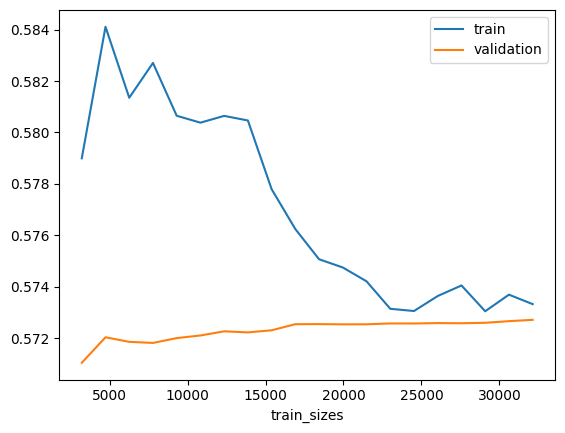

In [77]:
# hyper-parameter cv is set to 5
N, train_score, val_score = learning_curve(ridge , x_train_treeShold, y_train_treeShold, train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

[ 3816  5623  7431  9239 11046 12854 14662 16469 18277 20085 21892 23700
 25508 27315 29123 30931 32738 34546 36354 38162]


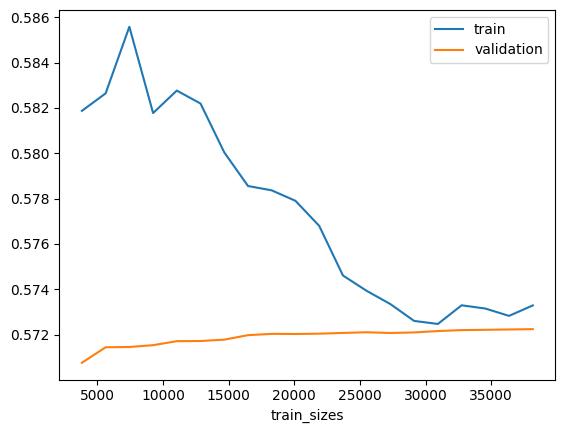

In [78]:
# hyper-parameter cv is set to 20
N, train_score, val_score = learning_curve(ridge , x_train_treeShold, y_train_treeShold, train_sizes=np.linspace(0.1, 1.0, 20), cv=20)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

[ 3883  5722  7561  9401 11240 13079 14919 16758 18598 20437 22276 24116
 25955 27794 29634 31473 33312 35152 36991 38831]


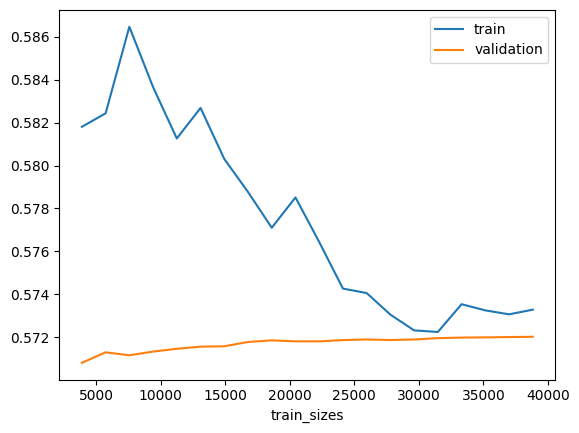

In [79]:
# hyper-parameter cv is set to 30
N, train_score, val_score = learning_curve(ridge , x_train_treeShold, y_train_treeShold, train_sizes=np.linspace(0.1, 1.0, 20), cv=30)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### learning curve avec MAE

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


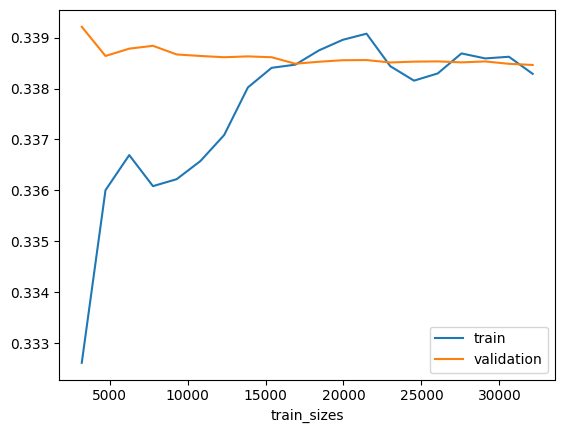

In [80]:
# hyper-parameter cv is set to 5
from sklearn.metrics import make_scorer, mean_absolute_error
scorer = make_scorer(mean_absolute_error)
N, train_score, val_score = learning_curve(ridge, x_train_treeShold, y_train_treeShold,
                                           scoring=scorer,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')

plt.legend()

#### learning curve avec RME

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


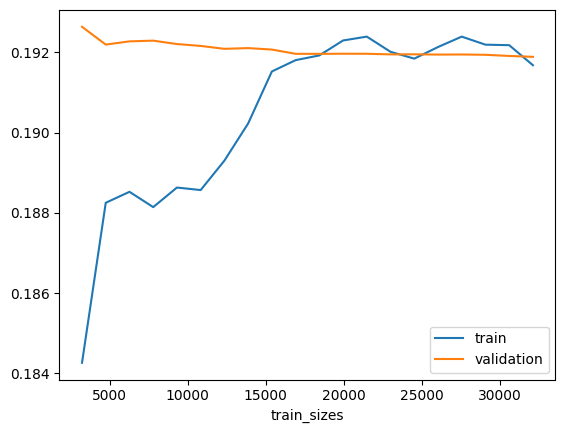

In [81]:
# hyper-parameter cv is set to 5
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error)
N, train_score, val_score = learning_curve(ridge, x_train_treeShold, y_train_treeShold,
                                           scoring=scorer,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### learning curve avec RMSE

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


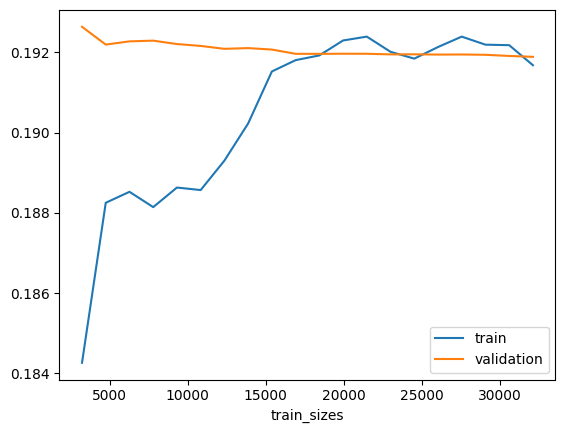

In [82]:
# hyper-parameter cv is set to 5
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error , squared = True)
N, train_score, val_score = learning_curve(ridge, x_train_treeShold, y_train_treeShold,
                                           scoring=scorer,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## 10-2 learning curve pour le modéle de linearRegression

#### learning curve avec R^2

[ 3816  5623  7431  9239 11046 12854 14662 16469 18277 20085 21892 23700
 25508 27315 29123 30931 32738 34546 36354 38162]


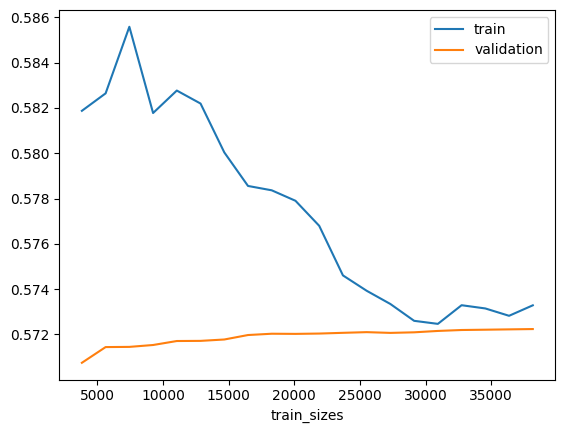

In [83]:
# hyper-parameter cv is set to 20
N, train_score, val_score = learning_curve(
    reg,
    x_train_treeShold,
    y_train_treeShold,
    train_sizes=np.linspace(0.1, 1.0, 20),
    cv=20
)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


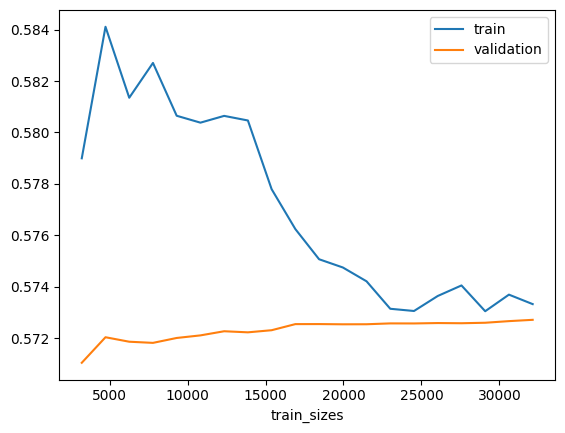

In [84]:
# hyper-parameter cv is set to 5
N, train_score, val_score = learning_curve(reg, x_train_treeShold, y_train_treeShold,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### learning curve avec MAE

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


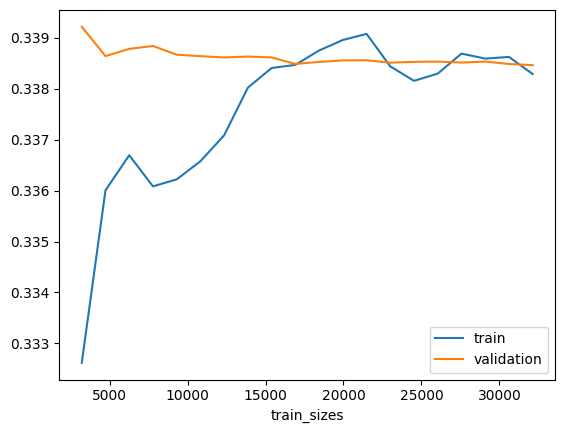

In [85]:
# hyper-parameter cv is set to 5
from sklearn.metrics import make_scorer, mean_absolute_error
scorer = make_scorer(mean_absolute_error)
N, train_score, val_score = learning_curve(reg, x_train_treeShold, y_train_treeShold,
                                           scoring=scorer,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### learning curve avec MSE

#### learning curve avec MSE

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


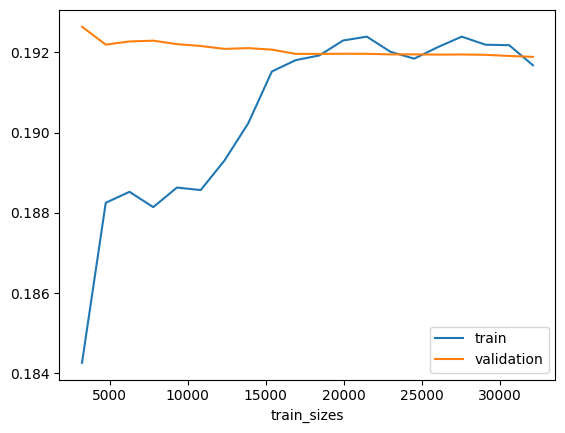

In [86]:
# hyper-parameter cv is set to 5
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error)
N, train_score, val_score = learning_curve(reg, x_train_treeShold, y_train_treeShold,
                                           scoring=scorer,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### learning curve avec RMSE

[ 3213  4735  6258  7780  9302 10824 12346 13869 15391 16913 18435 19958
 21480 23002 24524 26047 27569 29091 30613 32136]


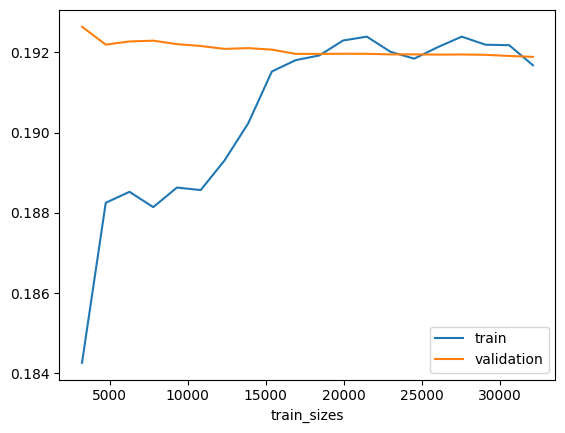

In [87]:
# hyper-parameter cv is set to 5
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error , squared = True)
N, train_score, val_score = learning_curve(reg, x_train_treeShold, y_train_treeShold,
                                           scoring=scorer,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()